In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
data = genfromtxt("./data/advertising.csv", delimiter=",", skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

In [3]:
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg


X_b, maxi, mini, avg = mean_normalization(X)

In [4]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01):
    N, d_plus1 = X_b.shape
    # Step1: Init parameters
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas.copy()]
    losses = []

    # Step2-6: SGD loop
    for epoch in range(n_epochs):
        for i in range(N):
            random_index = i
            xi = X_b[random_index : random_index + 1]
            yi = y[random_index : random_index + 1]

            # Step 3: predict
            y_hat_i = xi.dot(thetas)

            # Step 4: MSE loss for 1 sample
            li = (y_hat_i - yi) ** 2

            # Step 5: gradient
            d_dli = 2 * xi * (y_hat_i - yi)

            # Step 6: update
            thetas = thetas - learning_rate * d_dli

            thetas_path.append(thetas.copy())
            losses.append(li[0][0])
    return thetas_path, losses


sgd_theta, losses = stochastic_gradient_descent(X_b, y, 50, 0.01)

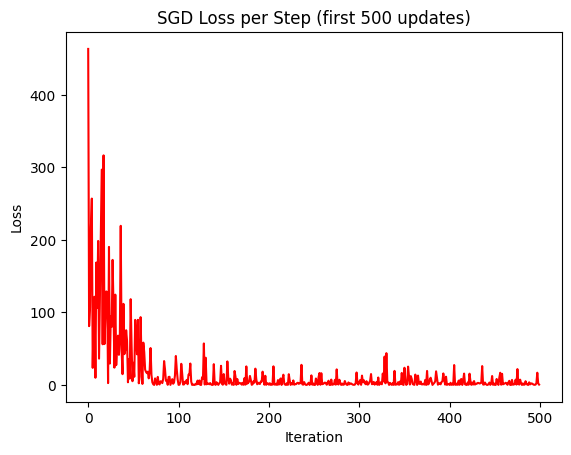

In [5]:
# In loss cho 500 bước đầu
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("SGD Loss per Step (first 500 updates)")
plt.show()

### Mini Batch Gradient Descent

In [6]:
def mini_batch_gradient_descent(
    X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01
):
    N, d_plus1 = X_b.shape
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas.copy()]
    losses = []

    for epoch in range(n_epochs):
        # shuffle data
        shuffled_indices = np.random.permutation(N)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i : i + minibatch_size]  # (m, d+1)
            yi = y_shuffled[i : i + minibatch_size]  # (m, 1)

            y_hat_i = xi.dot(thetas)
            loss = ((y_hat_i - yi).T.dot(y_hat_i - yi)) / minibatch_size

            gradient = (2 / minibatch_size) * (xi.T.dot(y_hat_i - yi))
            thetas = thetas - learning_rate * gradient

            thetas_path.append(thetas.copy())
            losses.append(loss[0][0])

    return thetas_path, losses


mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, 50, 20, 0.01)
print(losses)


[np.float64(222.80301709881934), np.float64(250.7156967271907), np.float64(244.26566983719258), np.float64(194.2335858052424), np.float64(259.06744530733783), np.float64(192.37659485098067), np.float64(154.28901253185705), np.float64(168.96403890097932), np.float64(159.84769524195357), np.float64(147.9907698290868), np.float64(140.14510770874995), np.float64(160.49480758448533), np.float64(204.83248351776507), np.float64(142.226030989945), np.float64(147.7914261778517), np.float64(93.70821825102014), np.float64(170.59810106328945), np.float64(105.53043082707006), np.float64(82.62071363709819), np.float64(92.5003245786082), np.float64(100.22585282439147), np.float64(117.94869249739818), np.float64(87.77032183735824), np.float64(102.9218768994469), np.float64(77.47812064554061), np.float64(53.646676936068936), np.float64(89.42719950193734), np.float64(80.14625263736124), np.float64(123.96564180873528), np.float64(87.8349277977685), np.float64(58.17579855042386), np.float64(83.70877051083

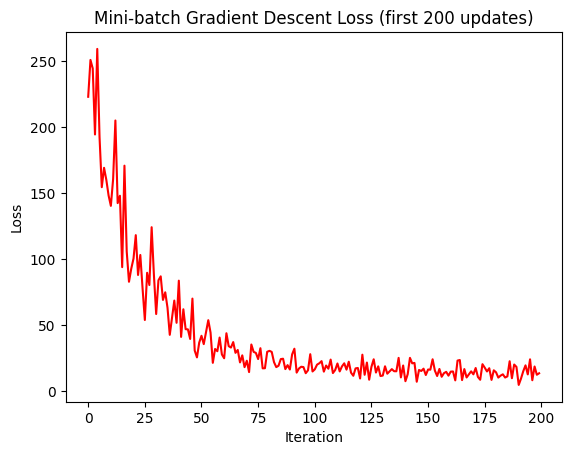

In [7]:
x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Mini-batch Gradient Descent Loss (first 200 updates)")
plt.show()

### Batch Gradient Descent

In [13]:
def batch_gradient_descent(X_b, y, n_epochs = 100, learning_rate=0.01):
    N, d_plus1 = X_b.shape
    # Step 1: Init parameter
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas.copy()]
    losses = []

    for epoch in range(n_epochs):
        y_hat = X_b.dot(thetas)
        loss = np.mean((y_hat - y) **2)

        gradients = (2/N) * X_b.T.dot(y_hat-y)
        thetas = thetas - learning_rate *gradients

        #log
        thetas_path.append(thetas)
        losses.append(loss)

    return thetas_path, losses

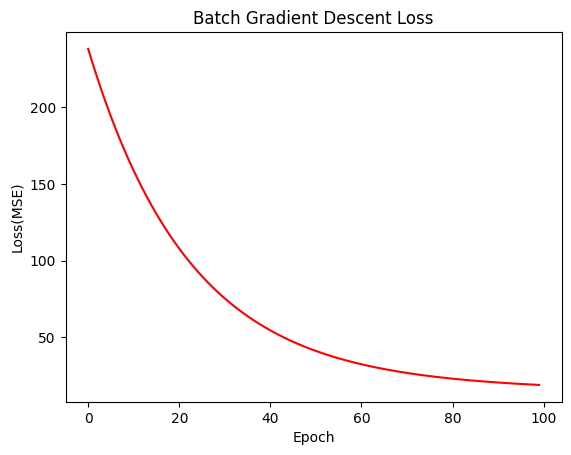

In [14]:
# Run test
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)

# Plot
x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color='r')
plt.xlabel("Epoch")
plt.ylabel("Loss(MSE)")
plt.title("Batch Gradient Descent Loss")
plt.show()